# Energy Dataset Exploratory Data Analysis

In [1]:
# Import all requied libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
import warnings
from sklearn.ensemble import RandomForestRegressor
warnings.filterwarnings("ignore")

In [11]:
#Load the dataset and check the dimentions
energy= pd.read_csv('UCI_data.csv', delimiter=',')
print(energy.shape)
print(df.head())

(19735, 28)
                  date         T1       RH_1         T2       RH_2         T3  \
0  2016-04-19 20:30:00  22.200000  39.500000  20.566667  37.656667  22.230000   
1  2016-03-05 04:40:00  20.356667  37.126667  17.566667  40.230000  20.890000   
2  2016-03-14 12:40:00  20.926667  38.790000  21.100000  35.526667  21.600000   
3  2016-01-22 15:30:00  18.290000  38.900000  17.290000  39.260000  18.390000   
4  2016-02-10 00:40:00  22.290000  42.333333  21.600000  40.433333  22.666667   

        RH_3         T4       RH_4         T5      ...         RH_9  T_out  \
0  37.030000  22.318571  36.610000  20.633333      ...        33.90   9.70   
1  37.663333  18.700000  36.260000  18.463333      ...        41.09   0.30   
2  36.290000  21.000000  34.826667  18.100000      ...        38.76   4.40   
3  39.326667  16.100000  38.790000  16.100000      ...        39.20   3.35   
4  43.363333  19.100000  40.900000  19.290000      ...        43.73   3.20   

   Press_mm_hg  RH_out  Windspee

## Data Exploration

In [12]:
# check the statistical details of th dataset
print(energy.describe().T)

                 count        mean         std         min         25%  \
T1             19735.0   21.686571    1.606066   16.790000   20.760000   
RH_1           19735.0   40.259739    3.979299   27.023333   37.333333   
T2             19735.0   20.341219    2.192974   16.100000   18.790000   
RH_2           19735.0   40.420420    4.069813   20.463333   37.900000   
T3             19735.0   22.267611    2.006111   17.200000   20.790000   
RH_3           19735.0   39.242500    3.254576   28.766667   36.900000   
T4             19735.0   20.855335    2.042884   15.100000   19.530000   
RH_4           19735.0   39.026904    4.341321   27.660000   35.530000   
T5             19735.0   19.592106    1.844623   15.330000   18.277500   
RH_5           19735.0   50.949283    9.022034   29.815000   45.400000   
T6             19735.0    7.910939    6.090347   -6.065000    3.626667   
RH_6           19735.0   54.609083   31.149806    1.000000   30.025000   
T7             19735.0   20.267106    

In [14]:
print(energy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
date             19735 non-null object
T1               19735 non-null float64
RH_1             19735 non-null float64
T2               19735 non-null float64
RH_2             19735 non-null float64
T3               19735 non-null float64
RH_3             19735 non-null float64
T4               19735 non-null float64
RH_4             19735 non-null float64
T5               19735 non-null float64
RH_5             19735 non-null float64
T6               19735 non-null float64
RH_6             19735 non-null float64
T7               19735 non-null float64
RH_7             19735 non-null float64
T8               19735 non-null float64
RH_8             19735 non-null float64
T9               19735 non-null float64
RH_9             19735 non-null float64
T_out            19735 non-null float64
Press_mm_hg      19735 non-null float64
RH_out           19735 non-null float64
Windspeed   

<Figure size 432x288 with 0 Axes>

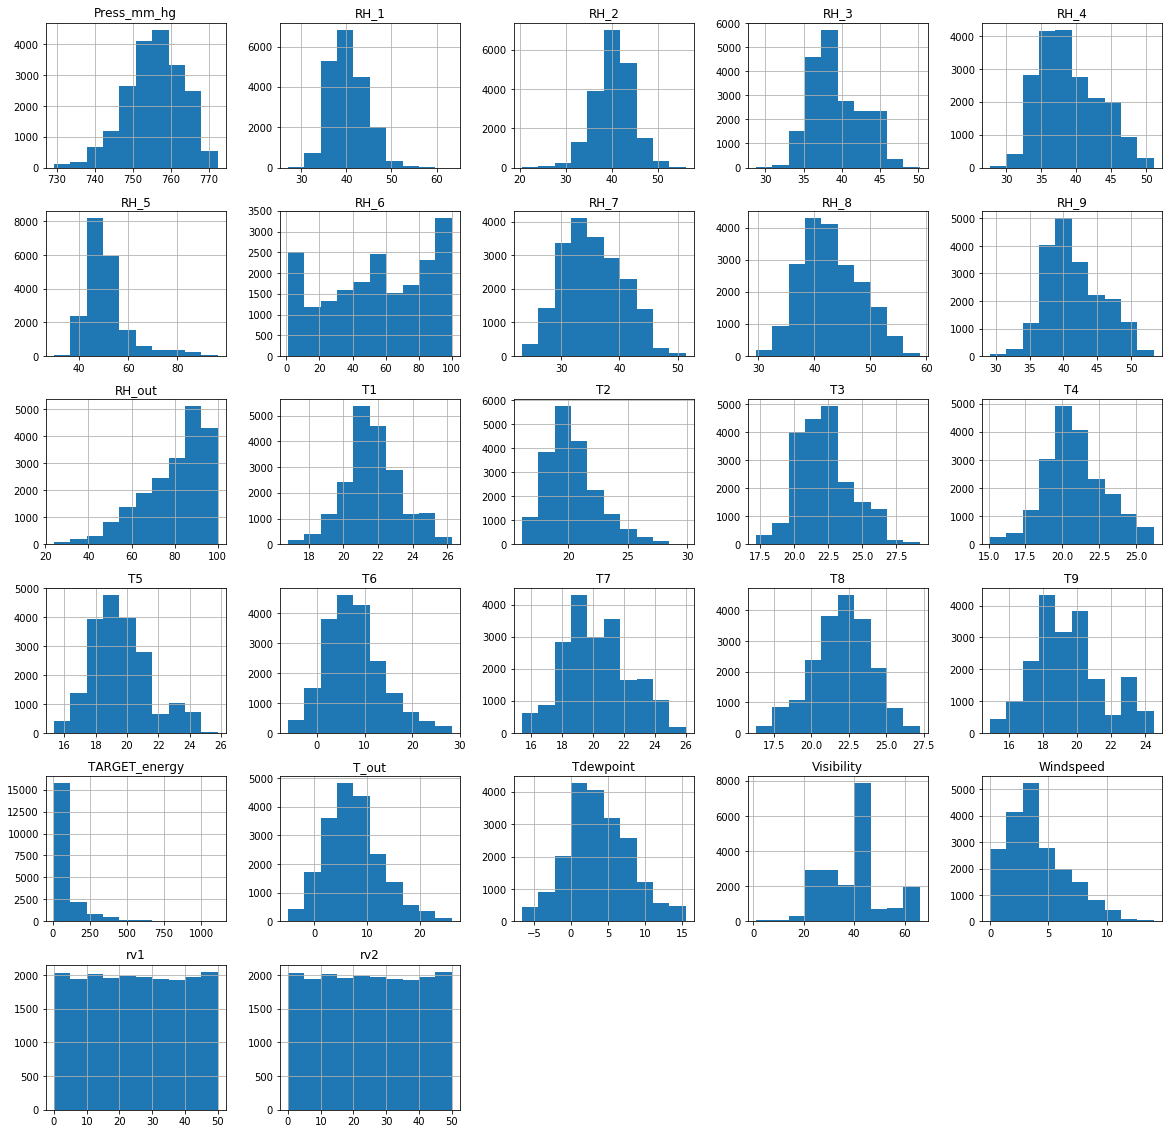

In [6]:
#Plot Histogram for all the attributes
plt.figure()
energy.hist(figsize=(20,20))
plt.show()

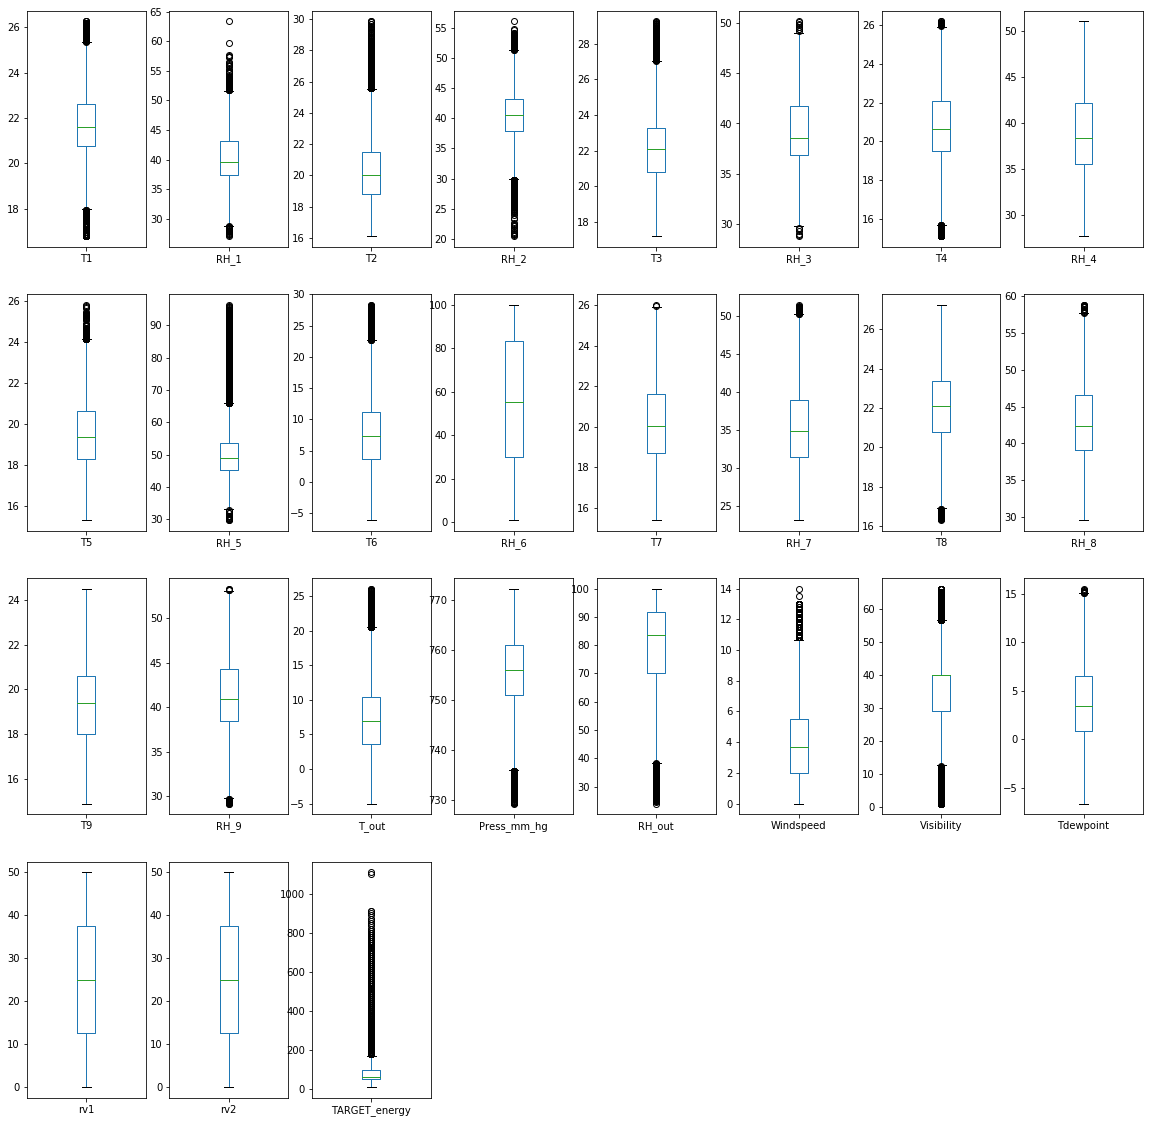

In [7]:
#Box plot for all the attributes
energy.plot(kind='box', subplots=True, layout=(4,8),
sharex=False, sharey=False, figsize=(20,20))
plt.show()

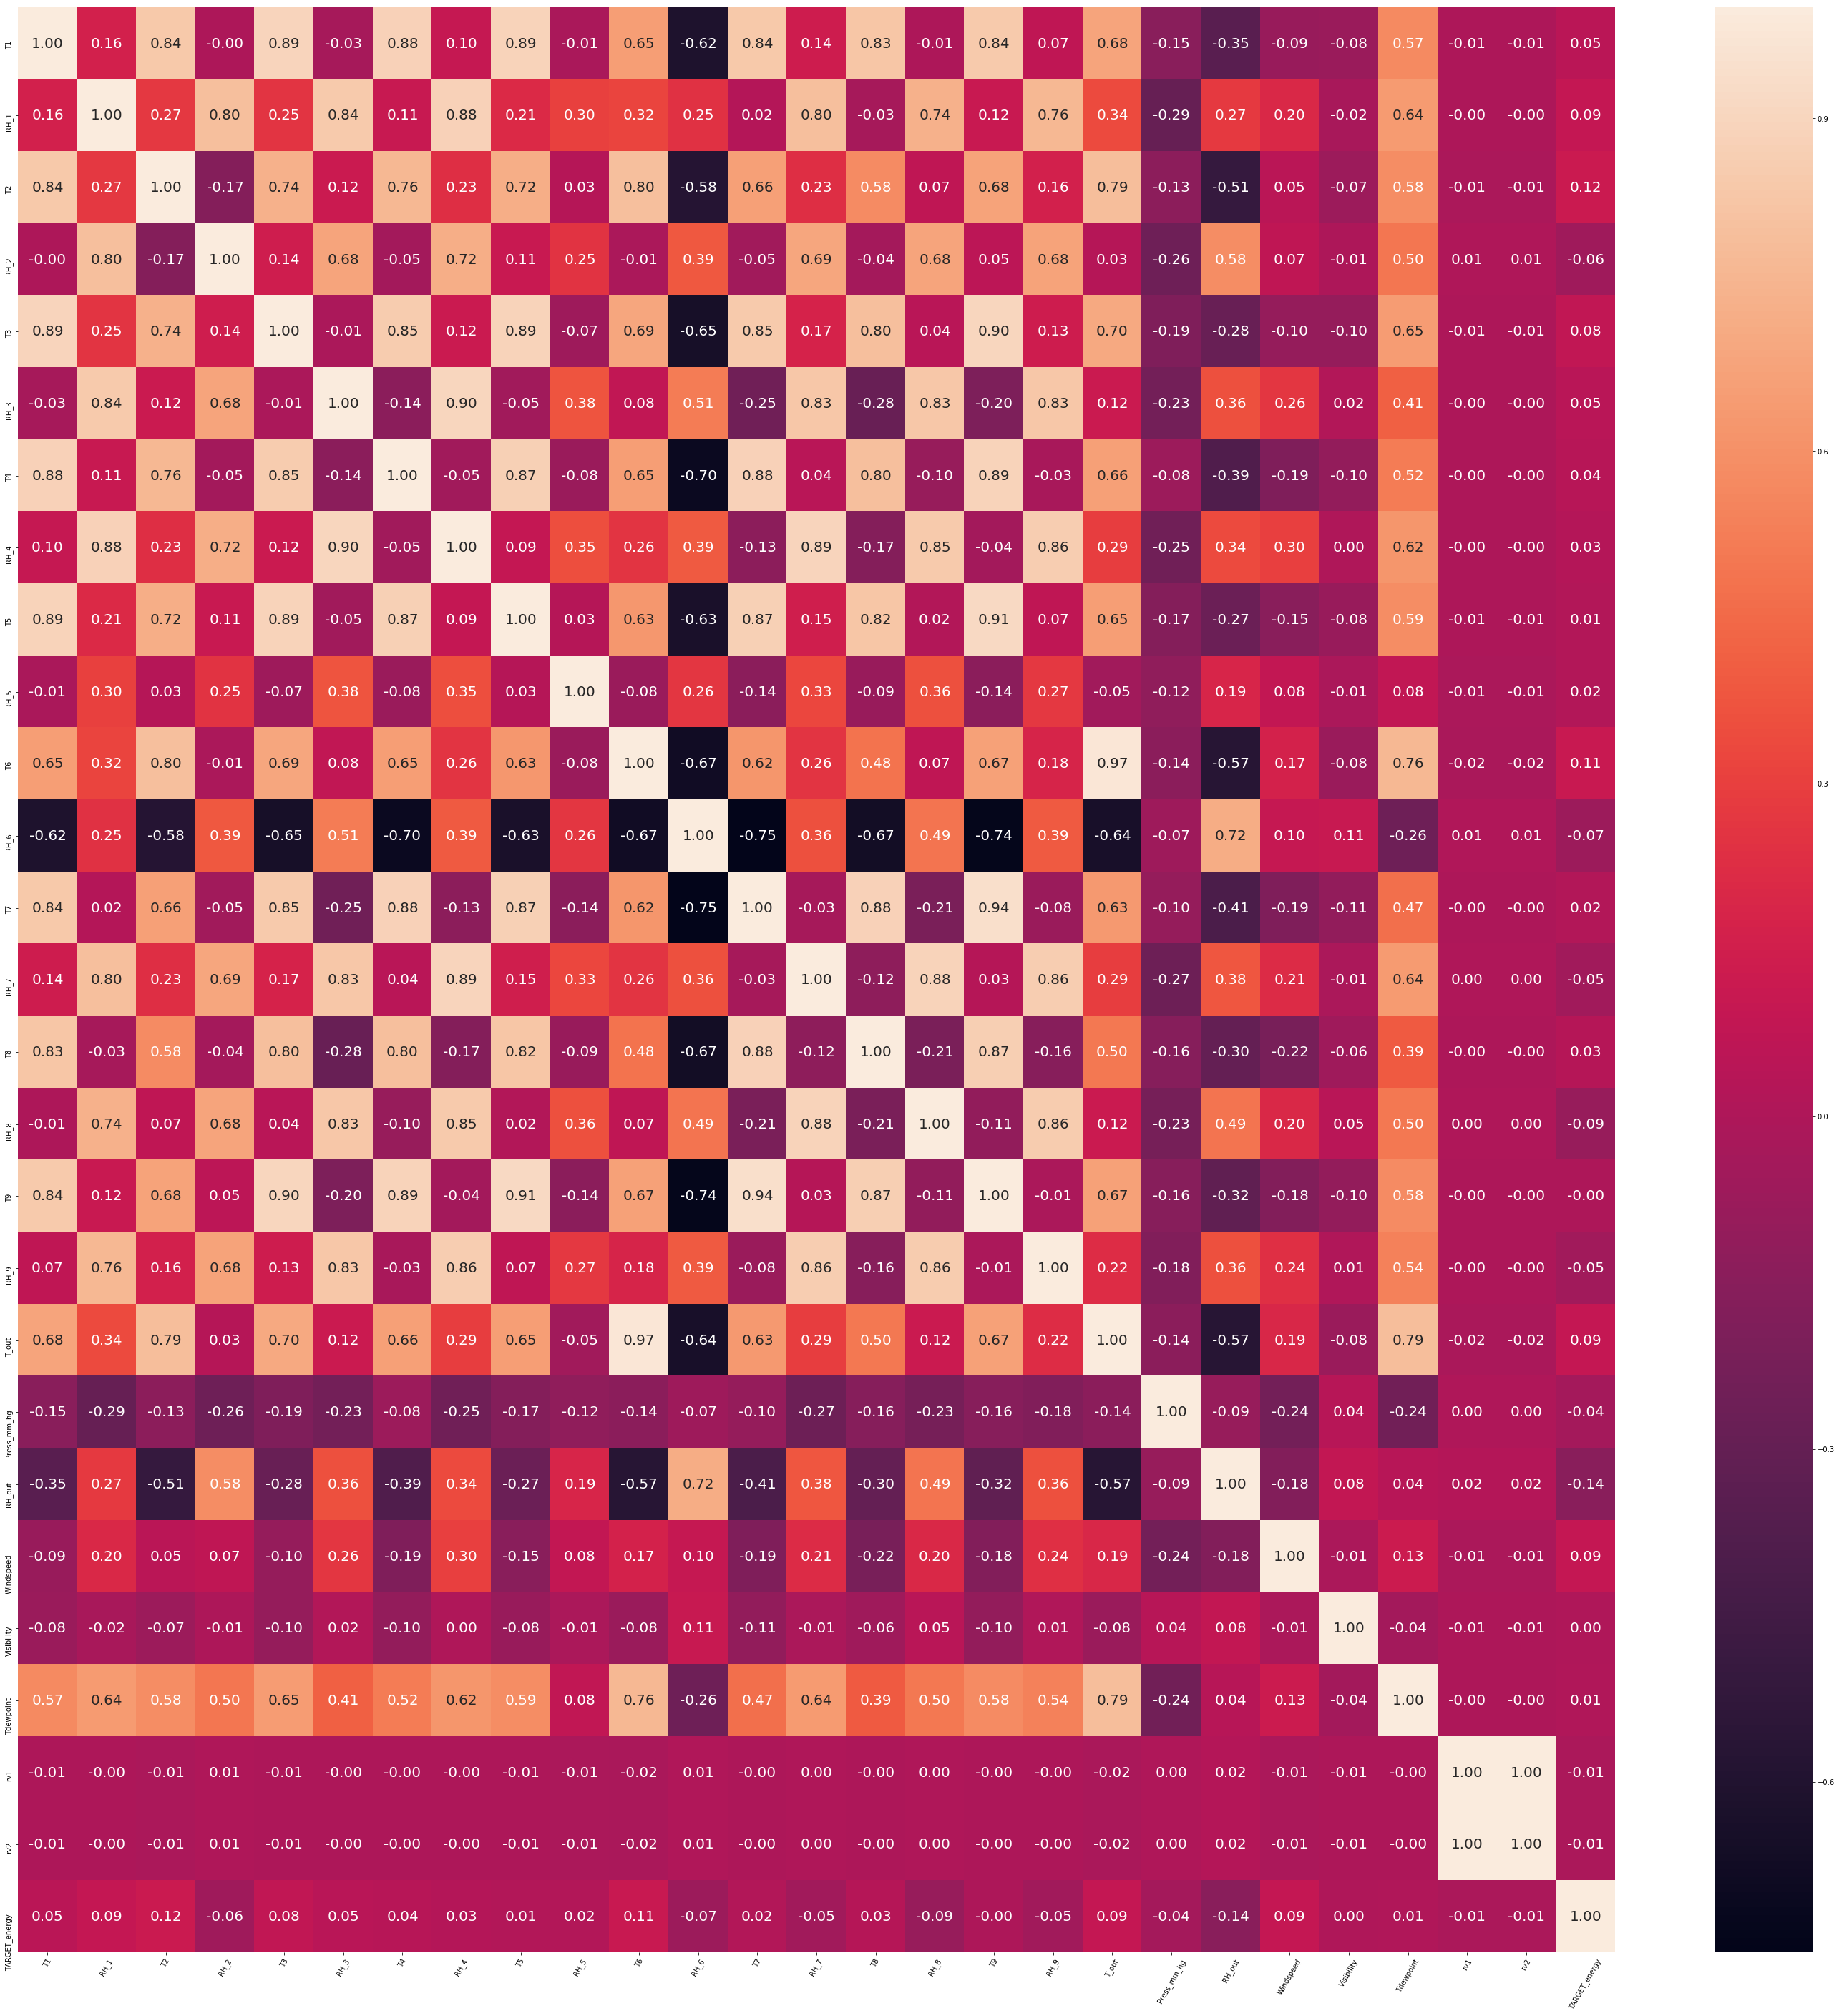

In [8]:
#Heatmap of all attributes
plt.figure(figsize=(50,50));
#sns.set(font_scale=3)
a = sns.heatmap(energy.corr(),annot=True, fmt=".2f", annot_kws={"size": 20});
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=60)
plt.show();

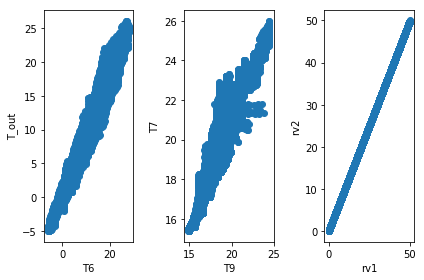

In [9]:
#Scatter plot between attributes with high Correlations 
fig, axes = plt.subplots(3,1, constrained_layout=True)
plt.subplot(131)
plt.scatter(energy["T6"], energy["T_out"])
plt.xlabel("T6")
plt.ylabel("T_out")
plt.subplot(132)
plt.scatter(energy["T9"], energy["T7"])
plt.xlabel("T9")
plt.ylabel("T7")
plt.subplot(133)
plt.scatter(energy["rv1"], energy["rv2"])
plt.xlabel("rv1")
plt.ylabel("rv2")
fig.tight_layout()
plt.show()

## Data Preprocessing

In [15]:
#Checking for null values
pd.isna(energy).sum()

date             0
T1               0
RH_1             0
T2               0
RH_2             0
T3               0
RH_3             0
T4               0
RH_4             0
T5               0
RH_5             0
T6               0
RH_6             0
T7               0
RH_7             0
T8               0
RH_8             0
T9               0
RH_9             0
T_out            0
Press_mm_hg      0
RH_out           0
Windspeed        0
Visibility       0
Tdewpoint        0
rv1              0
rv2              0
TARGET_energy    0
dtype: int64

#### Feature Engineering

In [18]:
def minuteAfterMidNight(datTimStr):
    tt = pd.to_datetime(datTimStr).time()
    return tt.hour * 60 + tt.minute 

energy['weekday'] = pd.to_datetime(energy['date']).dt.day_name()
energy['weekend'] = ((pd.to_datetime(energy['date']).dt.dayofweek) // 5 == 1).astype(str)
energy['Minutes'] = pd.to_datetime(energy['date']).apply(minuteAfterMidNight)

energy = pd.get_dummies(energy, prefix=['weekday', 'weekend'], columns=['weekday', 'weekend'])

In [19]:
# dropping redundant variables from correlation plot
energy.drop(["date", "rv1"],axis=1 , inplace=True)

#### Data Transformation

In [20]:
# Data Transformation
tran=preprocessing.StandardScaler()
energy = pd.DataFrame(tran.fit_transform(energy), columns = energy.columns , index=energy.index)
energy.head()

## Model Selection

#### Train and Test split

In [74]:
#Seperating Dependent and Independent variables
X = energy.drop("TARGET_energy", axis=1)
Y = energy["TARGET_energy"]

#Splitting dataframe to Train and Test sets with 80-20 ratio
trainX, testX, trainY, testY = train_test_split(X, Y, train_size=0.8,test_size=0.2, random_state = 42)
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

#Dataframe to store test results of all the models tested
results = pd.DataFrame(columns = ['Model', 'R2 Score', 'MSE'])

(15788, 35)
(3947, 35)
(15788L,)
(3947L,)


### Linear Regression model

In [75]:
#Building a Linear model and find accuracy of the model
linear_model = LinearRegression()
linear_model.fit(trainX, trainY)
linear_model_predict = linear_model.predict(testX)

#Calculate R2 and MSE scores of the model
r2score = r2_score(testY, linear_model_predict)
mse = mean_squared_error(testY, linear_model_predict)

#print R2 and MSE scores of the model
print('R_square score: %.2f' % r2score)
print('Mean square error: %.2f' % mse)

#Add the test results of the model to result dataframe
results = results.append(pd.DataFrame([['Linear Regression', r2score, mse]], columns = ['Model', 'R2 Score', 'MSE']))

R_square score: 0.17
Mean square error: 0.87


### Quadratic Regression Model

In [76]:
#Build the Polynomial regression model and testing its accuracy
from sklearn.preprocessing import PolynomialFeatures
polynom = PolynomialFeatures(degree=2)
polyTrainX = polynom.fit_transform(trainX)
polyTestX = polynom.fit_transform(testX)
linear_model.fit(polyTrainX, trainY)
poly_model_predict = linear_model.predict(polyTestX)

#Calculate R2 and MSE scores of the model
r2score = r2_score(testY, poly_model_predict)
mse = mean_squared_error(testY, poly_model_predict)

#print R2 and MSE scores of the model
print('R_square score: %.2f' % r2score)
print('Mean square error: %.2f' % mse)

#Add the test results of the model to result dataframe
results = results.append(pd.DataFrame([['Quadratic Regression', r2score, mse]], columns = ['Model', 'R2 Score', 'MSE']))


R_square score: 0.32
Mean square error: 0.71


### Ridge Model 

In [77]:
# Building a Polynomial Ridge Model 
ridgeReg = Ridge(alpha=0.01, normalize=True)
ridgeReg.fit(polyTrainX, trainY)
ridgeReg_predict = ridgeReg.predict(polyTestX)

#Calculate R2 and MSE scores of the model
r2score = r2_score(testY, ridgeReg_predict)
mse = mean_squared_error(testY, ridgeReg_predict)

#print R2 and MSE scores of the model
print('R_square score: %.2f' % r2score)
print('Mean square error: %.2f' % mse)

#Add the test results of the model to result dataframe
results = results.append(pd.DataFrame([['Ridge', r2score, mse]], columns = ['Model', 'R2 Score', 'MSE']))

R_square score: 0.29
Mean square error: 0.74


### Lasso Model

In [78]:
# Building a Polynomial Lasso Model 
lassoReg = Lasso(alpha=0.01, normalize=True)
lassoReg.fit(polyTrainX, trainY)
lassoReg_predict = lassoReg.predict(polyTestX)

#Calculate R2 and MSE scores of the model
r2score = r2_score(testY, lassoReg_predict)
mse = mean_squared_error(testY, lassoReg_predict)

#print R2 and MSE scores of the model
print('R_square score: %.2f' % r2score)
print('Mean square error: %.2f' % mse)

#Add the test results of the model to result dataframe
results = results.append(pd.DataFrame([['Lasso', r2score, mse]], columns = ['Model', 'R2 Score', 'MSE']))

R_square score: -0.00
Mean square error: 1.04


### Decision tree model

In [80]:
#Building Decision tree model
distree = tree.DecisionTreeRegressor()
distree = distree.fit(trainX,trainY)
distree_predict = distree.predict(testX)

#Calculate R2 and MSE scores of the model
r2score = r2_score(testY, distree_predict)
mse = mean_squared_error(testY, distree_predict)

#print R2 and MSE scores of the model
print('R_square score: %.2f' % r2score)
print('Mean square error: %.2f' % mse)

#Add the test results of the model to result dataframe
results = results.append(pd.DataFrame([['Decision Tree', r2score, mse]], columns = ['Model', 'R2 Score', 'MSE']))


R_square score: 0.34
Mean square error: 0.69


### Random Forest Model

In [81]:
# Building a Random Forest Model 
randForrest = RandomForestRegressor(n_estimators = 100)
randForrest = randForrest.fit(trainX, trainY)
randForrest_predY = randForrest.predict(testX)

#Calculate R2 and MSE scores of the model
r2score = r2_score(testY, randForrest_predY)
mse = mean_squared_error(testY, randForrest_predY)

#print R2 and MSE scores of the model
print('R_square score: %.2f' % r2score)
print('Mean square error: %.2f' % mse)

#Add the test results of the model to result dataframe
results = results.append(pd.DataFrame([['Random Forrest', r2score, mse]], columns = ['Model', 'R2 Score', 'MSE']))

R_square score: 0.61
Mean square error: 0.41


### AdaBoost Regressor model

In [82]:
# Building a AdaBoost Regressor model
adaboost = AdaBoostRegressor(n_estimators=50,learning_rate=0.01)
adaboost.fit(trainX, trainY)
adaboost_pred = adaboost.predict(testX)

#Calculate R2 and MSE scores of the model
r2score = r2_score(testY, adaboost_pred)
mse = mean_squared_error(testY, adaboost_pred)

#print R2 and MSE scores of the model
print('R_square score: %.2f' % r2score)
print('Mean square error: %.2f' % mse)

#Add the test results of the model to result dataframe
results = results.append(pd.DataFrame([['AdaBoost Regressor', r2score, mse]], columns = ['Model', 'R2 Score', 'MSE']))

R_square score: 0.13
Mean square error: 0.90


### MLP Regressor model

In [85]:
# Building a MLP Regressor model
mlp = MLPRegressor(hidden_layer_sizes=(50,))
mlp.fit(trainX, trainY)
pred_mlp = mlp.predict(testX)

#Calculate R2 and MSE scores of the model
r2score = r2_score(testY, pred_mlp)
mse = mean_squared_error(testY, pred_mlp)

#print R2 and MSE scores of the model
print('R_square score: %.2f' % r2score)
print('Mean squared error: %.2f' % mse)

#Add the test results of the model to result dataframe
results = results.append(pd.DataFrame([['MLP Regressor', r2score, mse]], columns = ['Model', 'R2 Score', 'MSE']))

R_square score: 0.39
Mean squared error: 0.63


### Model Comparision

In [86]:
results

,Model,R2 Score,MSE
0,Linear Regression,0.168563,0.866739
0,Quadratic Regression,0.315109,0.713971
0,Ridge,0.290460,0.739667
0,Lasso,-0.000065,1.042528
0,Decision Tree,0.341493,0.686467
0,Random Forrest,0.607825,0.408827
0,AdaBoost Regressor,0.134614,0.902130
0,MLP Regressor,0.393252,0.632510


## Parameter tuning

### Parameter tuning for MLP model

In [90]:
#parameter tuning for MLP model

#Specify the hyper parameters
param_grid = {"hidden_layer_sizes": [(1,),(50,)], 
              "activation": ["identity", "logistic", "tanh", "relu"], 
              "solver": ["lbfgs", "sgd", "adam"], 
              "alpha": [0.00005,0.0005]}

#Identify the best parameters using gridsearch
MLPReg= model_selection.GridSearchCV(MLPRegressor(max_iter = 7000),param_grid,scoring = 'neg_mean_squared_error', cv=5, n_jobs = -1  , verbose=2)
#Fir the model with best parameters
MLPReg.fit(trainX,trainY)

#print the best parameters identified
print(MLPReg.best_params_)
print(MLPReg.best_estimator_)

#Perform predection on test values 
pred_MLPReg = MLPReg.predict(testX)

#Calculate R2 and MSE scores of the model
r2score = r2_score(testY, pred_MLPReg)
mse = mean_squared_error(testY, pred_MLPReg)

#print R2 and MSE scores of the model
print('R_square score: %.2f' % r2score)
print('Mean squared error: %.2f' % mse)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   52.6s finished


{'alpha': 0.0005, 'activation': 'logistic', 'solver': 'adam', 'hidden_layer_sizes': (100,)}
MLPRegressor(activation='logistic', alpha=0.0005, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=7000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
R_square score: 0.48
Mean squared error: 0.55


### Parameter tuning for Random Forest Regressor Model

In [91]:
#parameter tuning for Random Forest Regressor Model

#Specify the hyper parameters
param_grid = [{
              'max_depth': [80, 150, 200,250],
              "max_features":['auto', 'sqrt', 'log2'],
              'n_estimators' : [100,150,200,250]
              }]

#Identify the best parameters using gridsearch
randomForestReg = model_selection.GridSearchCV(RandomForestRegressor(),param_grid,scoring = 'neg_mean_squared_error', cv=2, n_jobs = -1  , verbose=2)
#Fir the model with best parameters
randomForestReg.fit(trainX,trainY)

#print the best parameters identified
print(randomForestReg.best_params_)
print(randomForestReg.best_estimator_)

#Perform predection on test values 
pred_randomForestReg = randomForestReg.predict(testX)

#Calculate R2 and MSE scores of the model
r2score = r2_score(testY, pred_randomForestReg)
mse = mean_squared_error(testY, pred_randomForestReg)

#print R2 and MSE scores of the model
print('R_square score: %.2f' % r2score)
print('Mean squared error: %.2f' % mse)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed: 10.3min finished


{'max_features': 'log2', 'n_estimators': 200, 'max_depth': 80}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
R_square score: 0.62
Mean squared error: 0.40


## Feature Selection

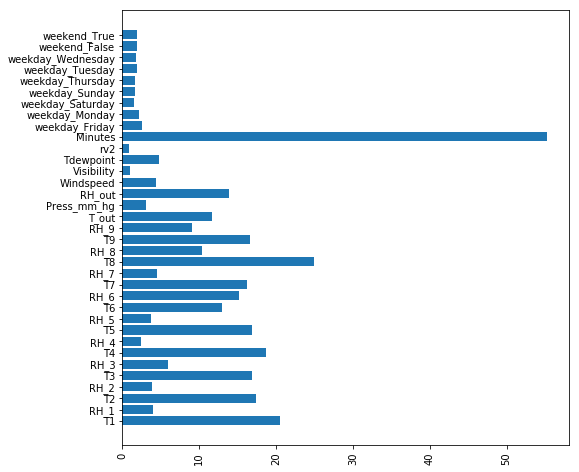

In [123]:
#select 15 best features using filter method
featureSelector = SelectKBest(score_func=f_classif, k=15).fit(trainX, trainY)
# plot the feature importance
plt.figure(figsize=(8,8))
scores = featureSelector.scores_
plt.xticks(rotation='vertical')
plt.barh(X.columns, scores, )
# get the selected feature vectors and transform train and test data 
TrainX_new = featureSelector.transform(trainX)
TestX_new = featureSelector.transform(testX)

#### Apply selected feature to Random forest regressor

In [119]:
# Apply selected feature to best Random forest regressor got after parameter tuning
randForrBest = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
                   max_features='log2', max_leaf_nodes=None,
                   min_impurity_decrease=0.0, min_impurity_split=None,
                   min_samples_leaf=1, min_samples_split=2,
                   min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
                   oob_score=False, random_state=None, verbose=0, warm_start=False)

randForrBest.fit(TrainX_new, trainY)
pred_randForrBest = randForrBest.predict(TestX_new)

#Calculate R2 and MSE scores of the model
r2score = r2_score(testY, pred_randForrBest)
mse = mean_squared_error(testY, pred_randForrBest)

#print R2 and MSE scores of the model
print('R_square score: %.2f' % r2score)
print('Mean squared error: %.2f' % mse)

R_square score: 0.62
Mean squared error: 0.40


#### Apply selected feature to  MLE regressor

In [120]:
# Apply selected feature to best MLE regressor got after parameter tuning
mlpRegBest = MLPRegressor(activation='logistic', alpha=0.0005, batch_size='auto',
               beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(100,), learning_rate='constant',
               learning_rate_init=0.001, max_iter=7000, momentum=0.9,
               n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
               random_state=None, shuffle=True, solver='adam', tol=0.0001,
               validation_fraction=0.1, verbose=False, warm_start=False)

mlpRegBest.fit(TrainX_new, trainY)
pred_mlpRegBest = mlpRegBest.predict(TestX_new)

#Calculate R2 and MSE scores of the model
r2score = r2_score(testY, pred_mlpRegBest)
mse = mean_squared_error(testY, pred_mlpRegBest)

#print R2 and MSE scores of the model
print('R_square score: %.2f' % r2score)
print('Mean squared error: %.2f' % mse)

R_square score: 0.35
Mean squared error: 0.68


## Feature Construction using PCA

[ 0.26787347  0.20268578  0.09088567  0.05616508  0.03578119  0.03530783
  0.03388371  0.03361245  0.03326293  0.03104441  0.02861088  0.02768021
  0.02753191  0.02176338  0.0152418 ]


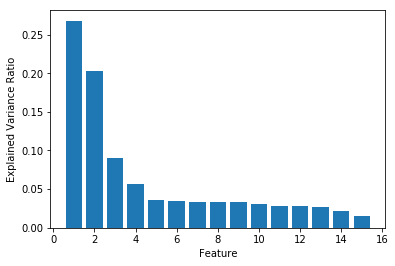

In [133]:

components = 15
pca = PCA(n_components=components).fit(trainX)
print(pca.explained_variance_ratio_)
plt.bar(np.arange(1,components+1), pca.explained_variance_ratio_)
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Feature")
plt.show()

#### Apply PCA on Random forest regressor Model

In [135]:
# PCA to project the data and extract the first 15 prociple components.
components = 15
pca = PCA(n_components=components).fit(trainX)
TrainX_new = pca.transform(trainX)
TestX_new = pca.transform(testX)

randForrBest1 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
                   max_features='log2', max_leaf_nodes=None,
                   min_impurity_decrease=0.0, min_impurity_split=None,
                   min_samples_leaf=1, min_samples_split=2,
                   min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
                   oob_score=False, random_state=None, verbose=0, warm_start=False)

randForrBest1.fit(TrainX_new, trainY)
RF_predict = randForrBest1.predict(TestX_new)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('R_square score: %.2f' % r2_score(testY, RF_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(testY, RF_predict))
print('Mean square error: %.2f' % mean_squared_error(testY, RF_predict))

R_square score: 0.48
Mean absolute error: 0.36
Mean square error: 0.54



#### Apply PCA on MLP Model

In [132]:
# PCA to project the data and extract the first 15 prociple components.
components = 15
pca = PCA(n_components=components).fit(trainX)
TrainX_new = pca.transform(trainX)
TestX_new = pca.transform(testX)

mlpRegBest1 = MLPRegressor(activation='logistic', alpha=0.0005, batch_size='auto',
               beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
               hidden_layer_sizes=(100,), learning_rate='constant',
               learning_rate_init=0.001, max_iter=7000, momentum=0.9,
               n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
               random_state=None, shuffle=True, solver='adam', tol=0.0001,
               validation_fraction=0.1, verbose=False, warm_start=False)

mlpRegBest1.fit(TrainX_new, trainY)
mlp_predict = mlpRegBest1.predict(TestX_new)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('R_square score: %.2f' % r2_score(testY, mlp_predict))
print('Mean absolute error: %.2f' % mean_absolute_error(testY, mlp_predict))
print('Mean square error: %.2f' % mean_squared_error(testY, mlp_predict))

R_square score: 0.37
Mean absolute error: 0.47
Mean square error: 0.65
